In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Het effect van Covid-19 op luchtkwaliteit
### Door Persijn Schutten en M'hamed Ibn Salah
### Groepsnummer: D4

## Introductie
De COVID-19 pandemie leidde wereldwijd tot ongekende maatregelen om de verspreiding van het virus in te dammen. Een van de meest ingrijpende maatregelen was de lockdown, waarbij steden en landen op slot gingen, bedrijven sloten en het verkeer stilviel. Naast de directe gevolgen voor de volksgezondheid en economie, had de lockdown ook onverwachte effecten op het milieu, waaronder de luchtkwaliteit.

Luchtkwaliteit verwijst naar de mate van vervuiling in de lucht die we inademen, en is van cruciaal belang voor de gezondheid van mens en milieu. Slechte luchtkwaliteit kan leiden tot ernstige gezondheidsproblemen, zoals astma, hart- en vaatziekten en vroegtijdige sterfte. Verschillende soorten luchtverontreinigende stoffen beïnvloeden de luchtkwaliteit, waaronder fijnstof (PM2.5 en PM10), stikstofdioxide (NO2), zwaveldioxide (SO2) en koolmonoxide (CO).

PM2.5 en PM10 verwijzen naar deeltjes in de lucht met een diameter kleiner dan respectievelijk 2.5 en 10 micrometer. Vanwege hun kleine omvang kunnen PM2.5-deeltjes diep in de longen doordringen en zelfs in de bloedbaan terechtkomen, waardoor ze schadelijker zijn dan grotere deeltjes. Stikstofdioxide (NO2) en zwaveldioxide (SO2) zijn gassen die voornamelijk vrijkomen door verkeer en industrie, en die ademhalingsproblemen en andere gezondheidskwalen kunnen veroorzaken. Koolmonoxide (CO) is een kleurloos, geurloos gas dat kan leiden tot vergiftiging en zelfs de dood bij hoge concentraties.

Onder deze verontreinigende stoffen is PM2.5 het meest zorgwekkend vanwege zijn vermogen om diep in het menselijk lichaam door te dringen en ernstige gezondheidsproblemen te veroorzaken. Daarom wordt PM2.5 vaak beschouwd als de belangrijkste indicator van luchtkwaliteit.

In dit dataverhaal onderzoeken we twee verschillende perspectieven over de impact van de COVID-19 lockdown op de luchtkwaliteit. Het eerste perspectief stelt dat de lockdown leidde tot een verbetering van de luchtkwaliteit door de vermindering van verkeer en industriële activiteiten. Het tweede perspectief betoogt dat de waargenomen veranderingen in luchtkwaliteit voornamelijk te wijten waren aan seizoensgebonden fluctuaties in plaats van de lockdown zelf. Door middel van data-analyse en visualisaties proberen we deze perspectieven nader te onderzoeken en te begrijpen.

## Datasets

Er worden in totaal vier datasets gebruikt:

**Country Lockdown Dates Dataset**<br>
Beschrijving: Deze dataset geeft de data weer waarop in verschillende landen lockdowns werden doorgevoerd tijdens de COVID-19-pandemie.<br>
Instances: 307<br>
Attributes: 5<br>
Missing Values: 21.11%<br>

**WHO Air Quality Dataset**​<br>
Beschrijving: Deze dataset bevat wereldwijde informatie over luchtkwaliteit door de World Health Organization.<br>
Instances: 40,098<br>
Attributes: 20<br>
Missing Values: 28.56% ​<br>

**City Day Dataset**​<br>
Beschrijving: Deze dataset bevat dagelijkse gegevens over de luchtkwaliteit voor verschillende Indiase steden.<br>
Instances: 29,531<br>
Attributes: 16<br>
Missing Values: 18.73%<br>

**Indian Cities Database**​<br>
Beschrijving: Deze dataset bevat verschillende Indiase steden met hun geografische en demografische informatie.<br>
Instances: 213<br>
Attributes: 6<br>
Missing Values: 0.00%

## Preprocessing
Alle rijen met missende data voor 2019 en 2020 zijn verwijderd. <br>
Alle datums zijn geconverteerd naar het juiste formaat.<br>

### Eerste perspectief: Eerste perspectief: De Covid-19 lockdown heeft voor een verbetering van luchtkwaliteit gezorgd.

Vrijwel alle landen zijn in het eerste kwartaal van 2020 in lockdown gegaan door de Covid-19 pandemie. Dit is te zien in de onderstaande visualisatie, waarbij de data duidelijk de wereldwijde impact van de pandemie weergeeft. De lockdownmaatregelen varieerden in strengheid en duur, afhankelijk van de regionale verspreiding van het virus en de reactie van elk land.

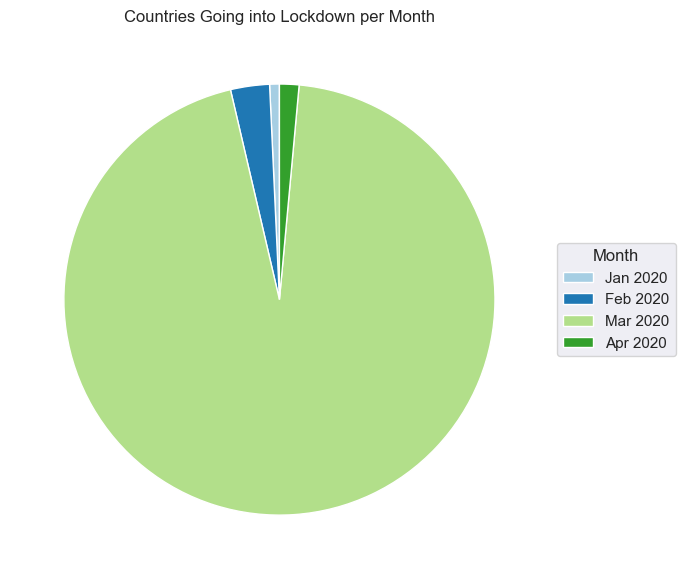

In [2]:
# Load the data
df = pd.read_csv('countryLockdowndates.csv')

# Drop rows with missing dates
df = df.dropna(subset=['Date'])

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Keep only the first lockdown date per country
df = df.drop_duplicates(subset=['Country/Region'], keep='first')

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

# Count the number of lockdowns per month
monthly_lockdowns = df['Country/Region'].groupby(df['Month']).count()

# Calculate the percentage of lockdowns per month
total_lockdowns = monthly_lockdowns.sum()
lockdown_percentages = (monthly_lockdowns / total_lockdowns) * 100

# Create the pie chart
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts = ax.pie(lockdown_percentages, startangle=90, colors=plt.cm.Paired.colors)

# Add legend
ax.legend(wedges, lockdown_percentages.index.strftime('%b %Y'), title="Month", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set title
plt.title('Countries Going into Lockdown per Month')

# Show the plot
plt.tight_layout()
plt.show()


Omdat elk land in het begin van 2020 in lockdown ging, wordt er in de onderstaande visualisatie per land de gemiddelde PM2.5-waarden vergeleken met 2019 en 2020. Er is gekozen voor PM2.5 omdat deze deeltjesgrootte diep in de longen doordringt, waardoor het een cruciale indicator is voor luchtkwaliteit en gezondheidseffecten.

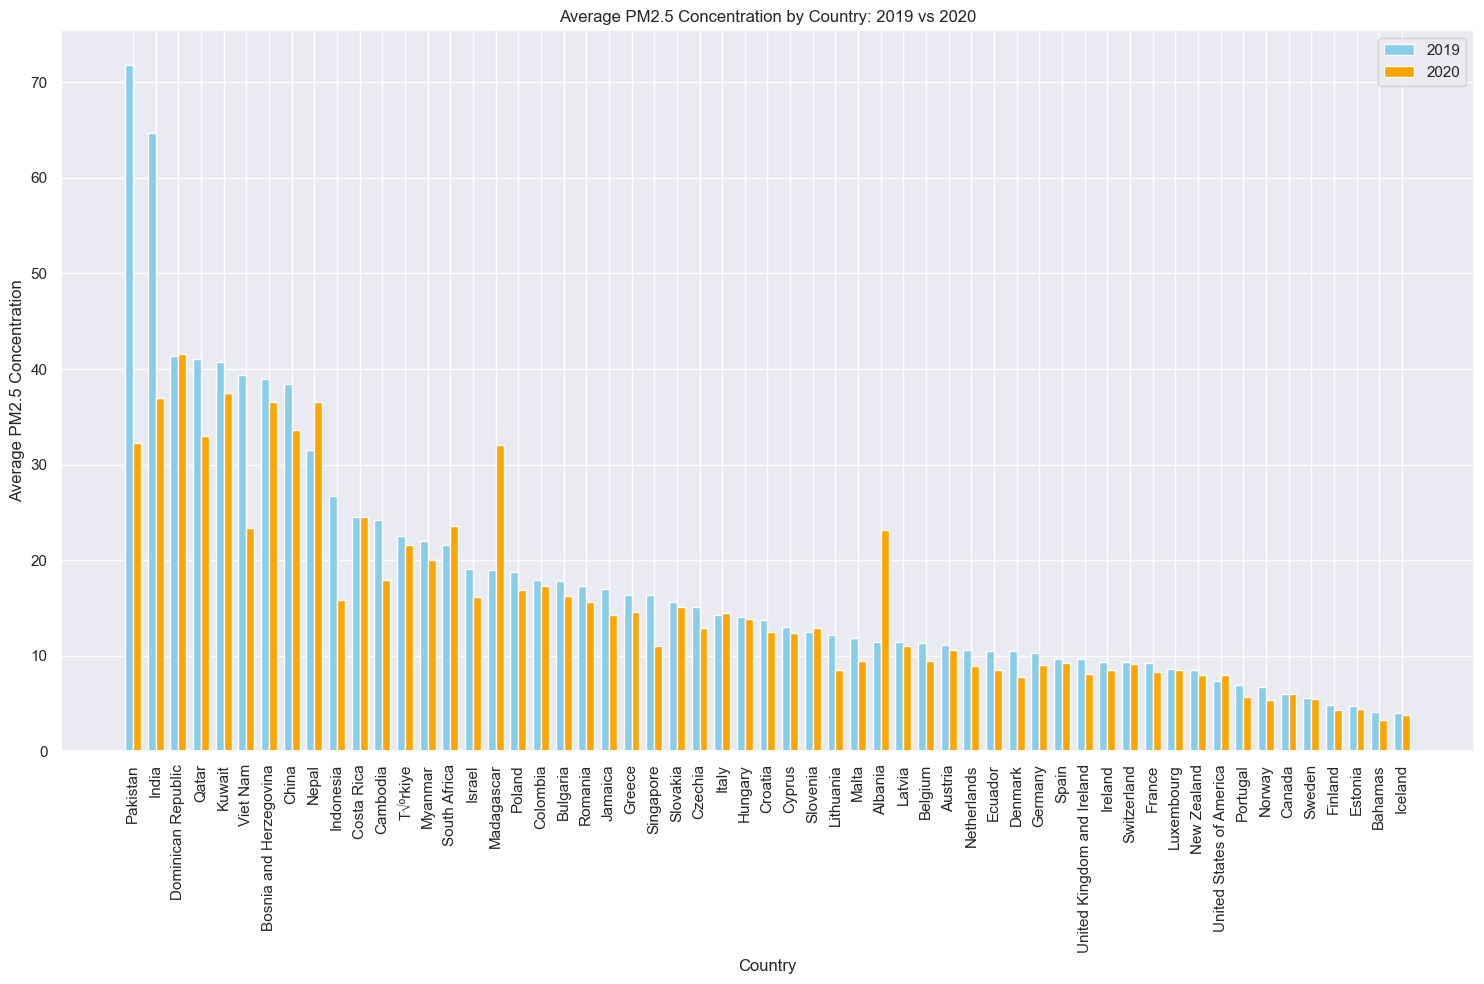

In [3]:
# Load the data
df = pd.read_csv('who_air.csv')

# Filter data for 2019 and 2020
df_filtered = df[df['year'].isin([2019, 2020])]

# Calculate average PM2.5 concentration for each country and year
avg_pm25 = df_filtered.groupby(['country_name', 'year'])['pm25_concentration'].mean().reset_index()

# Pivot the data to have 2019 and 2020 as separate columns
avg_pm25_pivot = avg_pm25.pivot(index='country_name', columns='year', values='pm25_concentration')
avg_pm25_pivot.columns.name = None
avg_pm25_pivot = avg_pm25_pivot.reset_index()
avg_pm25_pivot.columns = ['Country', '2019', '2020']

# Remove countries with missing values in either 2019 or 2020
avg_pm25_pivot = avg_pm25_pivot.dropna()

# Sort by 2019 values in descending order
avg_pm25_pivot = avg_pm25_pivot.sort_values('2019', ascending=False)

# Create the bar chart
plt.figure(figsize=(15, 10))
x = range(len(avg_pm25_pivot))
width = 0.35

plt.bar(x, avg_pm25_pivot['2019'], width, label='2019', color='skyblue')
plt.bar([i + width for i in x], avg_pm25_pivot['2020'], width, label='2020', color='orange')

plt.xlabel('Country')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Average PM2.5 Concentration by Country: 2019 vs 2020')
plt.xticks([i + width/2 for i in x], avg_pm25_pivot['Country'], rotation=90, ha='center')
plt.legend()

plt.tight_layout()
plt.show()

In deze visualisatie is duidelijk te zien dat gemiddeld genomen de meeste landen hun luchtkwaliteit in 2020 hebben verbeterd ten opzichte van 2019. Het is echter belangrijk op te merken dat het gemiddelde luchtkwaliteitsniveau per land niet altijd de volledige situatie weergeeft. Binnen dezelfde landen kunnen steden aanzienlijke verschillen vertonen in luchtkwaliteit, vanwege factoren zoals bevolkingsdichtheid, economische activiteiten en geografische kenmerken. Het analyseren van individuele steden biedt daarom meer gedetailleerde en nauwkeurige inzichten.<br>

Daarom hebben we ervoor gekozen om specifiek naar India te kijken om de verschillen tussen 2019 en 2020 per stad te onderzoeken. India is gekozen vanwege de ernstige luchtkwaliteitsproblemen in vergelijking met andere landen, de grote variabiliteit in luchtkwaliteit tussen steden, en de beschikbaarheid van goede data.<br>

In de wereldwijde analyse van de impact van COVID-19 lockdowns op luchtkwaliteit hebben we ons gericht op PM2.5 als meetwaarde van luchtverontreiniging. PM2.5 verwijst naar fijne deeltjes met een diameter kleiner dan 2.5 micrometer, die diep in de longen kunnen doordringen en schadelijk kunnen zijn voor de gezondheid. Deze deeltjes zijn een belangrijke indicator van luchtkwaliteit, vooral omdat ze directe gezondheidseffecten kunnen hebben bij langdurige blootstelling.<br>

Bij het verfijnen van onze analyse naar steden in India, hebben we ervoor gekozen om de Air Quality Index (AQI) te gebruiken in plaats van PM2.5. AQI is een gestandaardiseerde maatstaf die verschillende verontreinigende stoffen, zoals PM2.5, PM10, NO2, SO2, CO en O3, omzet in één enkele waarde die de algehele luchtkwaliteit weergeeft. Het voordeel van AQI is dat het een meer alomvattende beoordeling biedt van de luchtkwaliteit door rekening te houden met meerdere verontreinigende stoffen die elk hun eigen gezondheidseffecten hebben.<br>

De keuze om over te schakelen naar AQI bij het analyseren van steden in India komt voort uit de beschikbaarheid van meer gedetailleerde gegevens en het feit dat AQI een meer holistische benadering biedt van luchtkwaliteitsmetingen. In tegenstelling tot PM2.5 geeft AQI ook inzicht in kortetermijnvariaties in luchtkwaliteit, wat nuttig kan zijn bij het begrijpen van de directe impact van lockdownmaatregelen op de dagelijkse gezondheid van de bevolking.<br>

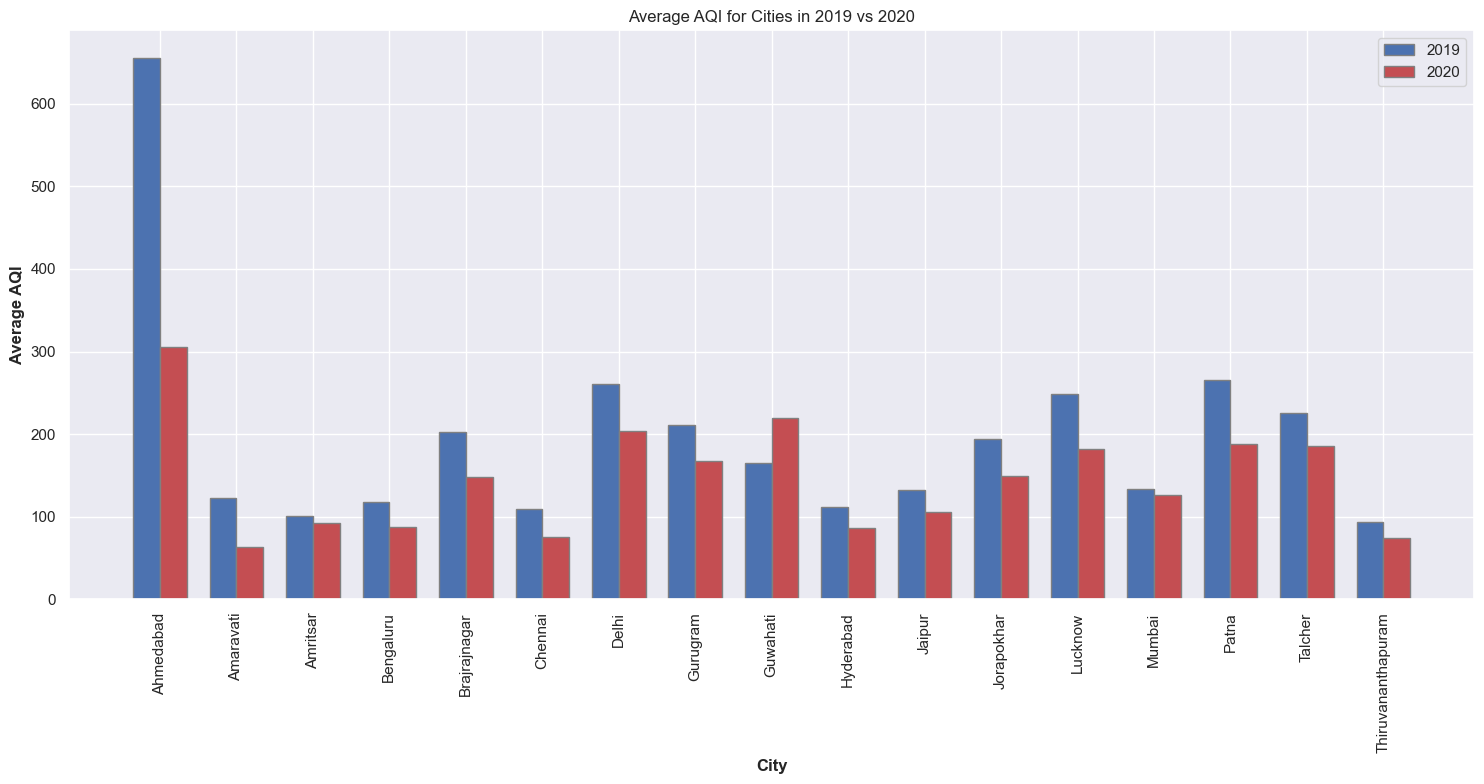

In [4]:
city_day = pd.read_csv('city_day.csv')
cities_db = pd.read_csv('Indian Cities Database.csv')

cities = city_day['City'].value_counts()

start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);

cities_db = pd.read_csv('Indian Cities Database.csv')
city_day = pd.read_csv('city_day.csv')


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

df11 = pollutants_filtered_2019[['City','AQI']]
df22 = pollutants_filtered_2020[['City','AQI']]

df_2019_coord = df11.groupby('City')['AQI'].mean().to_frame().reset_index()
df_2020_coord = df22.groupby('City')['AQI'].mean().to_frame().reset_index()

df_2019_AQI = pd.merge(df_2019_coord,cities_db,on='City')
df_2019_AQI['AQI'] = df_2019_AQI['AQI'].round(0)
df_2020_AQI = pd.merge(df_2020_coord,cities_db,on='City')
df_2020_AQI['AQI'] = df_2020_AQI['AQI'].round(0)

# Calculate average AQI for each city for 2019
avg_aqi_2019 = df_2019_AQI.groupby('City')['AQI'].mean().reset_index()
avg_aqi_2019.columns = ['City', 'Avg_AQI_2019']

# Calculate average AQI for each city for 2020
avg_aqi_2020 = df_2020_AQI.groupby('City')['AQI'].mean().reset_index()
avg_aqi_2020.columns = ['City', 'Avg_AQI_2020']

# Merge the two DataFrames on City
avg_aqi = pd.merge(avg_aqi_2019, avg_aqi_2020, on='City')

# Plotting
plt.figure(figsize=(15, 8))
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = range(len(avg_aqi))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, avg_aqi['Avg_AQI_2019'], color='b', width=bar_width, edgecolor='grey', label='2019')
plt.bar(r2, avg_aqi['Avg_AQI_2020'], color='r', width=bar_width, edgecolor='grey', label='2020')

# Add labels
plt.xlabel('City', fontweight='bold')
plt.ylabel('Average AQI', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(avg_aqi))], avg_aqi['City'], rotation=90)
plt.title('Average AQI for Cities in 2019 vs 2020')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In deze visualisatie is dezelfde trend van stad tot stad in India zichtbaar als wereldwijd tussen landen. De meeste steden tonen een verbetering in luchtkwaliteit na de lockdown in 2020 in vergelijking met 2019. Dit fenomeen kan worden geïllustreerd door de volgende kaart te bekijken, waarop links de gemiddelde luchtkwaliteit in 2019 en rechts de gemiddelde luchtkwaliteit in 2020 wordt weergegeven.<br>

Deze vergelijking benadrukt hoe de verminderde economische activiteit en reisbewegingen tijdens de lockdown hebben bijgedragen aan schonere lucht in veel steden over de hele wereld, inclusief India. Door specifiek naar India te kijken, kunnen we de uitdagingen van luchtvervuiling beter begrijpen, gezien de grote variatie in luchtkwaliteit tussen steden en de impact van maatregelen op lokale schaal.

In [5]:
# Initialize the DualMap
m = plugins.DualMap(location=(22.9734, 78.6569), tiles=None, zoom_start=5)

# Add tile layers with attributions
folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors').add_to(m)
folium.TileLayer('openstreetmap', attr='Map data © OpenStreetMap contributors').add_to(m)

# Create feature groups
fg_1 = folium.FeatureGroup(name='2019').add_to(m.m1)
fg_2 = folium.FeatureGroup(name='2020').add_to(m.m2)

# Function to get color based on AQI value
def get_color(aqi):
    if aqi <= 50:
        return 'green'
    elif aqi <= 100:
        return 'yellow'
    elif aqi <= 200:
        return 'orange'
    elif aqi <= 300:
        return 'red'
    elif aqi <= 400:
        return 'purple'
    else:
        return 'maroon'

# Add 2019 data
for lat, lon, value, name in zip(df_2019_AQI['Lat'], df_2019_AQI['Long'], df_2019_AQI['AQI'], df_2019_AQI['City']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=10,
        popup=folium.Popup('<strong>City</strong>: ' + str(name).capitalize() + '<br>' +
                           '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
        color=get_color(value),
        fill=True,
        fill_color=get_color(value),
        fill_opacity=0.7
    ).add_to(fg_1)

# Add 2020 data
for lat, lon, value, name in zip(df_2020_AQI['Lat'], df_2020_AQI['Long'], df_2020_AQI['AQI'], df_2020_AQI['City']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=10,
        popup=folium.Popup('<strong>City</strong>: ' + str(name).capitalize() + '<br>' +
                           '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
        color=get_color(value),
        fill=True,
        fill_color=get_color(value),
        fill_opacity=0.7
    ).add_to(fg_2)

# Add layer control
folium.LayerControl(collapsed=False).add_to(m)

# Display the map
m


Het grootste en meest opvallende verschil in luchtkwaliteit tussen 2019 en 2020 is te zien in de stad Ahmedabad. Deze stad staat bekend om zijn ernstige luchtvervuilingsproblemen, veroorzaakt door diverse bronnen zoals industrie, verkeer en geografische ligging. Het vergelijken van de gemiddelde luchtkwaliteit over deze twee jaren biedt belangrijke inzichten in de impact van de COVID-19 lockdown en andere factoren op de luchtvervuiling.<br>

Ahmedabad, als een van de meest vervuilende steden in India, laat vaak extreem hoge niveaus van PM2.5 en andere schadelijke stoffen zien. In 2020 hebben de beperkingen op economische activiteiten en verkeer tijdens de lockdown aanzienlijk bijgedragen aan een daling van de luchtvervuiling. Dit illustreert duidelijk hoe verminderde industriële productie, minder verkeer en een algemene afname van menselijke activiteiten kunnen leiden tot een schonere atmosfeer.<br>

Door specifiek in te zoomen op Ahmedabad kunnen we beter begrijpen hoe lokale maatregelen en economische dynamiek de luchtkwaliteit beïnvloeden. Dit biedt waardevolle lessen voor beleidsmakers en stadsplanners in het verbeteren van de luchtkwaliteit en het aanpakken van de gezondheidseffecten van luchtvervuiling op de bevolking.

In [6]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)

start_date1 = '2019-01-01'
end_date1 = '2019-12-31'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-12-31'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Fijnstof'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Fijnstof'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')

    fig.add_shape(
        dict(
            type="line",
            x0="2020-03-25",
            y0=0,
            x1="2020-03-25",
            y1=1,
            xref='x',
            yref='paper',
            line=dict(color="Red",width=4)
        )
    )

    fig.show()

pollution_comparison('Ahmedabad')

**De verticale rode lijn markeert de datum van de eerste lockdown in India. Met fijnstof wordt zowel PM2.5 als PM10 bedoeld.**<br>

In de visualisatie is duidelijk te zien dat de concentraties van NO2, SO2, fijnstof (PM2.5 en PM10) en CO aanzienlijk zijn gedaald direct na de eerste lockdown in de stad Ahmedabad. Dit biedt sterke argumenten voor de impact van de lockdownmaatregelen op de luchtkwaliteit.<br>

**Directe Impact van de Lockdown**: De visualisatie toont een scherpe daling van luchtverontreinigende stoffen vanaf het moment van de eerste lockdown. Dit wijst er duidelijk op dat de beperkingen op economische activiteiten, transport en andere menselijke activiteiten directe positieve gevolgen hadden voor de luchtkwaliteit in Ahmedabad. Dit sluit aan bij wereldwijde patronen waar verminderde emissies door industriële processen en verkeer hebben geleid tot schonere lucht tijdens de pandemie.<br>

**Consistente Trends met Wereldwijde Data**: De observatie in Ahmedabad komt overeen met wat wereldwijd is waargenomen tijdens de pandemie, waarbij veel steden en regio's een verbetering van de luchtkwaliteit hebben ervaren als gevolg van lockdowns. Dit geeft aan dat de mechanismen die hier zijn waargenomen, breed toepasbaar zijn en de effectiviteit van dergelijke maatregelen benadrukken in het verminderen van luchtverontreiniging.

### Conclusie
We begonnen wereldwijd te kijken naar de impact van de COVID-19 lockdowns op luchtkwaliteit om een breed patroon te kunnen identificeren. Door verschillende landen te vergelijken, konden we vaststellen dat de verminderde economische activiteiten en mobiliteit tijdens de lockdowns over het algemeen leidden tot een verbetering van de luchtkwaliteit. Dit patroon werd ondersteund door gegevens die wereldwijd werden verzameld, waarbij landen met diverse economische structuren en geografische omstandigheden werden betrokken.<br>

Vervolgens richtten we ons specifiek op India vanwege de bekende uitdagingen op het gebied van luchtvervuiling en de beschikbaarheid van gedetailleerde gegevens. India staat wereldwijd bekend om zijn hoge niveaus van luchtverontreinigende stoffen, met grote variaties tussen steden als gevolg van verschillen in industriële activiteiten, verkeersdrukte en geografische omstandigheden zoals windpatronen en topografie.<br>

Binnen India zoomden we dieper in op een specifieke stad, zoals Ahmedabad, om nog nauwkeuriger de impact van de lockdowns te analyseren. Ahmedabad is een van de meest vervuilde steden in India, waar de luchtvervuiling grotendeels wordt veroorzaakt door industriële emissies en verkeersgerelateerde uitstoot. Door de luchtkwaliteit vóór en tijdens de lockdown te vergelijken, konden we concreet zien hoe de verminderde menselijke activiteiten hebben bijgedragen aan een significante daling van luchtverontreinigende stoffen zoals NO2, SO2, fijnstof (PM2.5 en PM10) en CO.<br>

Deze gefaseerde benadering van wereldwijd naar nationaal naar stedelijk niveau stelt ons in staat om overtuigende argumenten te formuleren over de verbetering van de luchtkwaliteit tijdens de COVID-19 lockdowns. De consistente daling van luchtverontreinigende stoffen op verschillende geografische schalen ondersteunt de hypothese dat beperkingen op economische activiteiten en mobiliteit hebben bijgedragen aan schonere lucht. 

## Tweede perspectief: De verandering in luchtkwaliteit kwam voornamelijk door seizoensgebonden fluctuaties en een algemene vermindering in luchtvervuiling.

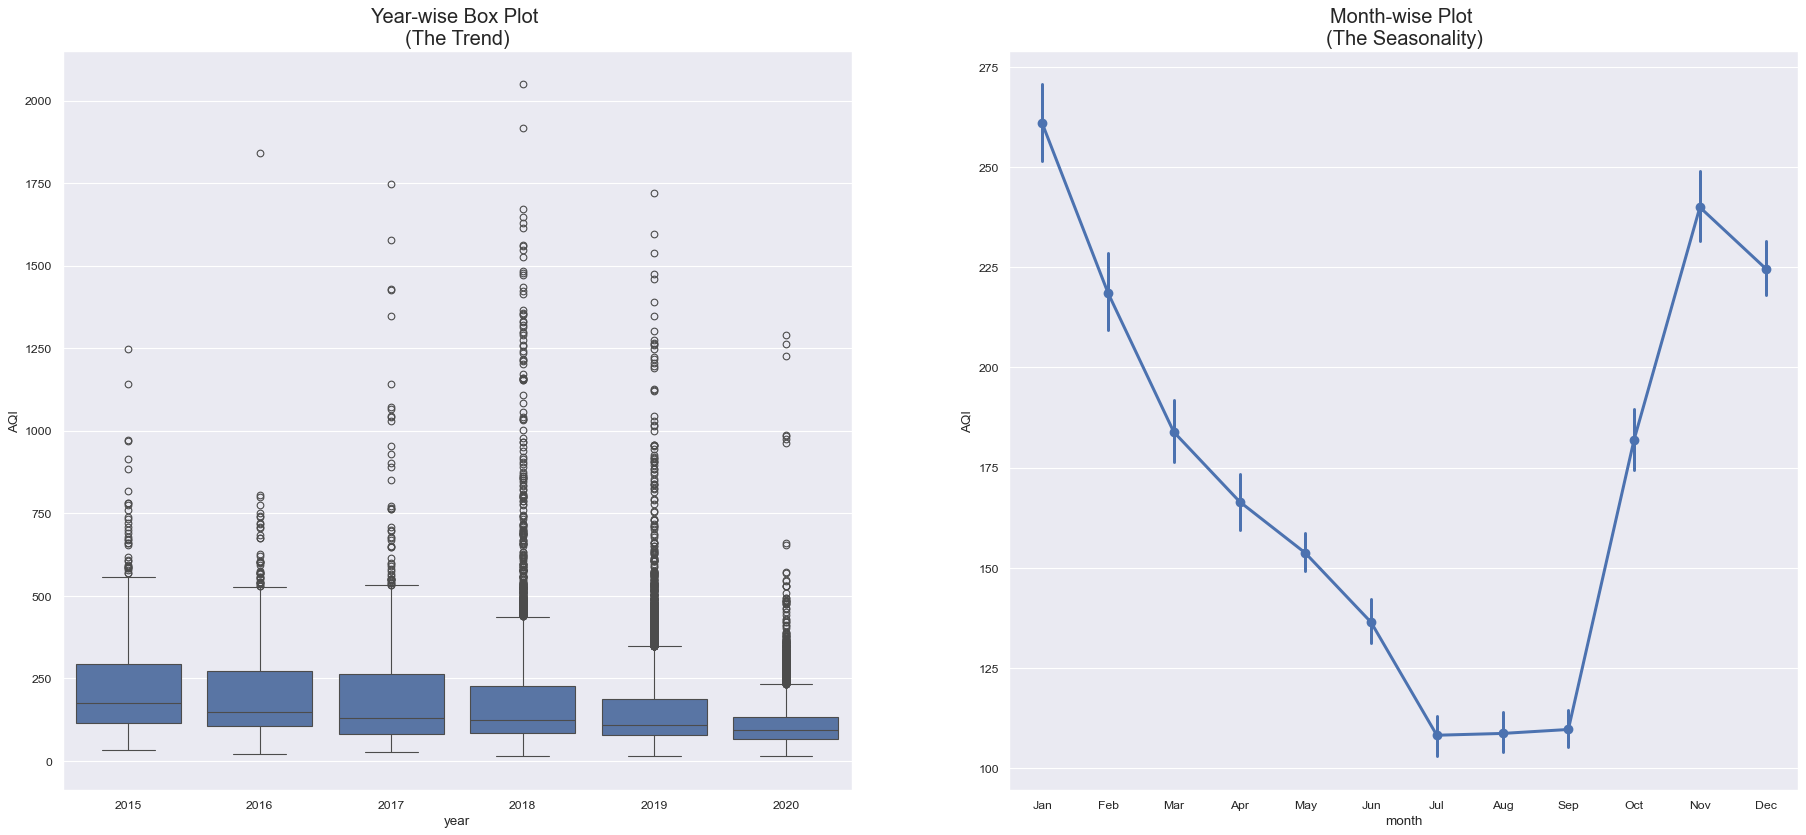

In [7]:
city_day['Date'] = pd.to_datetime(city_day['Date'])
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(28,12), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

df = city_day.copy()
value='AQI'
trend_plot(df,value)

De onderstaande punten uit de visualisatie geven belangrijke inzichten die het tweede perspectief ondersteunen, namelijk dat de veranderingen in luchtkwaliteit grotendeels te wijten zijn aan seizoensgebonden fluctuaties en bredere trends in luchtvervuiling, niet uitsluitend aan de lockdownmaatregelen.<br>

**Algemene Trends in Luchtvervuiling**: De mediane waarden van de luchtverontreinigende stoffen vertonen over het algemeen een dalende trend, wat suggereert dat er mogelijk inspanningen zijn om de luchtvervuiling te verminderen of dat er natuurlijke fluctuaties zijn die bijdragen aan deze verbetering.<br>

**Seizoensgebonden Invloeden**: De visualisatie toont duidelijk aan dat de niveaus van luchtverontreinigende stoffen in India dalen tijdens de maanden juli en augustus, wat samenvalt met het begin van het moessonseizoen. Deze periode wordt gekenmerkt door verhoogde neerslag, wat kan helpen bij het verminderen van luchtvervuiling door het uitwassen van verontreinigende stoffen uit de atmosfeer.<br>

**Stijging in de Wintermaanden**: Tegelijkertijd laten de gegevens zien dat de luchtverontreiniging weer begint toe te nemen en haar piek bereikt tijdens de wintermaanden. Dit wordt vaak toegeschreven aan factoren zoals verhoogde verbranding van gewasresten na de oogst, wat bijdraagt aan verhoogde niveaus van PM2.5 en andere deeltjes.<br>

Deze observaties ondersteunen de hypothese dat de veranderingen in luchtkwaliteit die we zien, zoals waargenomen tijdens de pandemie, deels kunnen worden verklaard door seizoensgebonden variaties en bredere trends in luchtvervuiling, naast de effecten van de lockdownmaatregelen. Deze argumenten bieden een bredere context voor de waargenomen verschuivingen in luchtkwaliteit en benadrukken dat een volledig begrip van deze verschuivingen vereist dat we rekening houden met natuurlijke cycli en andere langetermijntrends in luchtvervuiling.

## Reflectie op feedback

Eerst wilde we als onderwerp de effecten van luchtkwaliteit op Covid-19 gezondsheids consequenties. Uit de feedback van de presentatie kwam vooral naar voren dat we een te moeilijk onderwerp hadden gevonden. Het was erg moeilijk om correlaties te vinden tussen luchtkwaliteit en covid-19 consequenties, omdat slechte luchtkwaliteit ook hevig correleert met hoge bevolkingsdichtheid en armere gebieden, wat covid-19 consequenties ook verergerde.
Uiteindelijk hadden we voor dit onderwerp gekozen, wat soortgelijk is en makkelijker te visualiseren was.

## Work Distribution
#### Persijn Schutten: Visualizaties en argumenten
#### M'hamed Ibn Salah: Introductie, dataset & preprocessing
#### Tim Karwofodi: Niks